In [63]:
import pandas as pd
import numpy as np

In [64]:
data = pd.read_excel('/kaggle/input/tsi2-3rd/data_generated (5 inputs 2 outputs 3337 points).xlsx')
data.head()

,Period,tsi,tsio2,w,r,cie x,cie y
0,200,10,30,80,40,0.241,0.233
1,200,15,30,80,40,0.275,0.302
2,200,20,30,80,40,0.347,0.403
3,200,25,30,80,40,0.310,0.243
4,200,30,30,80,40,0.229,0.097


In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [66]:
print(data.columns)


Index(['Period', 'tsi', 'tsio2', 'w', ' r', 'cie x', 'cie y'], dtype='object')


In [67]:
X = data.drop(['cie x', 'cie y'], axis=1)
y = data[["cie x", "cie y"]].values

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [69]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(5, 1)),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 4, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 3, 32)               │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,674 (49.51 KB)

 Trainable params: 12,674 (49.51 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

history = model.fit(X_train_cnn, y_train, epochs=200, batch_size=16, validation_data=(X_test_cnn, y_test), verbose=1)

Epoch 1/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0159 - mae: 0.0942 - val_loss: 0.0067 - val_mae: 0.0600
Epoch 2/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 - mae: 0.0619 - val_loss: 0.0040 - val_mae: 0.0469
Epoch 3/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - mae: 0.0515 - val_loss: 0.0026 - val_mae: 0.0378
Epoch 4/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032 - mae: 0.0427 - val_loss: 0.0019 - val_mae: 0.0318
Epoch 5/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - mae: 0.0376 - val_loss: 0.0019 - val_mae: 0.0302
Epoch 6/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - mae: 0.0347 - val_loss: 0.0018 - val_mae: 0.0297
Epoch 7/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - mae: 0.0329 - val_loss: 0.0015 - val_mae: 0.0274
Epoch 8/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - mae: 0.0310 - val_loss: 0.0014 - val_mae: 0.0261
Epoch 9/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

# MSE vs Epoch Graph

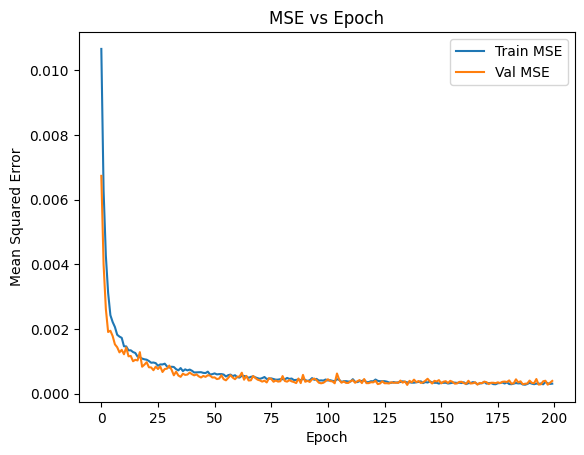

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Epoch')
plt.legend()
plt.show()


# Scatter Plot of the Absolute Error

In [72]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


y_test shape: (668, 2)
y_pred shape: (668, 2)


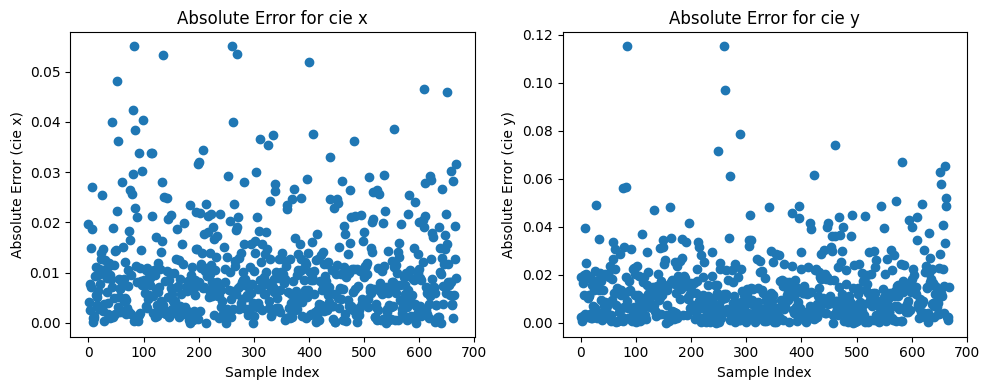

In [73]:
abs_error = np.abs(y_test - y_pred)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(abs_error)), abs_error[:, 0])
plt.xlabel('Sample Index')
plt.ylabel('Absolute Error (cie x)')
plt.title('Absolute Error for cie x')

plt.subplot(1, 2, 2)
plt.scatter(range(len(abs_error)), abs_error[:, 1])
plt.xlabel('Sample Index')
plt.ylabel('Absolute Error (cie y)')
plt.title('Absolute Error for cie y')

plt.tight_layout()
plt.show()

# Represent Training Results

In [74]:
print("Training Results:")
print(f"Final Training Loss (MSE): {history.history['loss'][-1]}")
print(f"Final Validation Loss (MSE): {history.history['val_loss'][-1]}")


Training Results:
Final Training Loss (MSE): 0.0003070359234698117
Final Validation Loss (MSE): 0.00039177772123366594


# Loss Curve

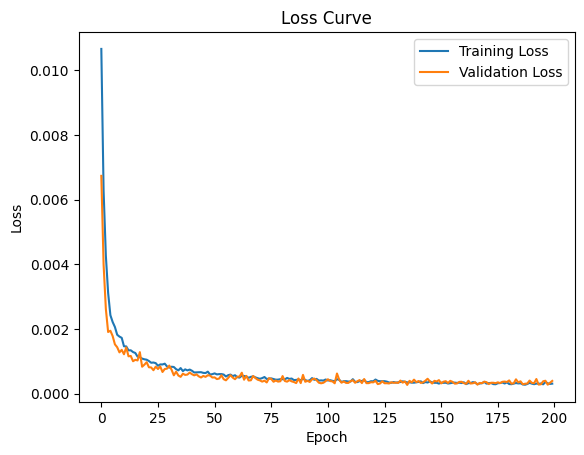

In [75]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


In [76]:

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2:.4f}")

Mean Squared Error: 0.0003
Root Mean Squared Error: 0.0174
Mean Absolute Error: 0.0124
R-Squared: 0.9767


# MAE Curve

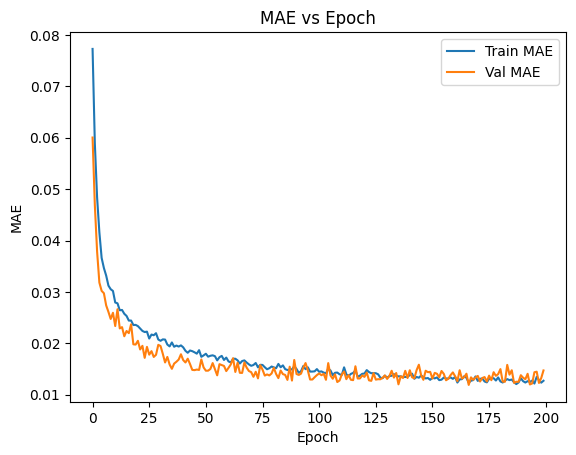

In [77]:
if 'mae' in history.history:
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.title('MAE vs Epoch')
    plt.legend()
    plt.show()
else:
    print("MAE not tracked in model history. Add `metrics=['mae']` to model.compile() to view MAE curve.")

# True vs Predicted Curve

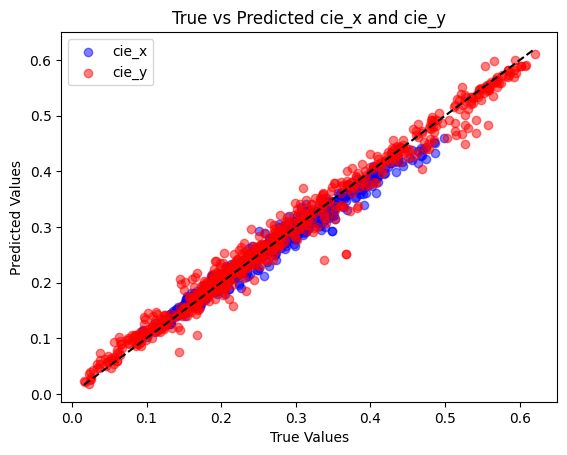

In [80]:
plt.scatter(y_test[:,0], y_pred[:,0], label="cie_x", color='blue', alpha=0.5)
plt.scatter(y_test[:,1], y_pred[:,1], label="cie_y", color='red', alpha=0.5)
plt.plot([min(y_test.flatten()), max(y_test.flatten())], [min(y_test.flatten()), max(y_test.flatten())], 'k--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("True vs Predicted cie_x and cie_y")
plt.show()


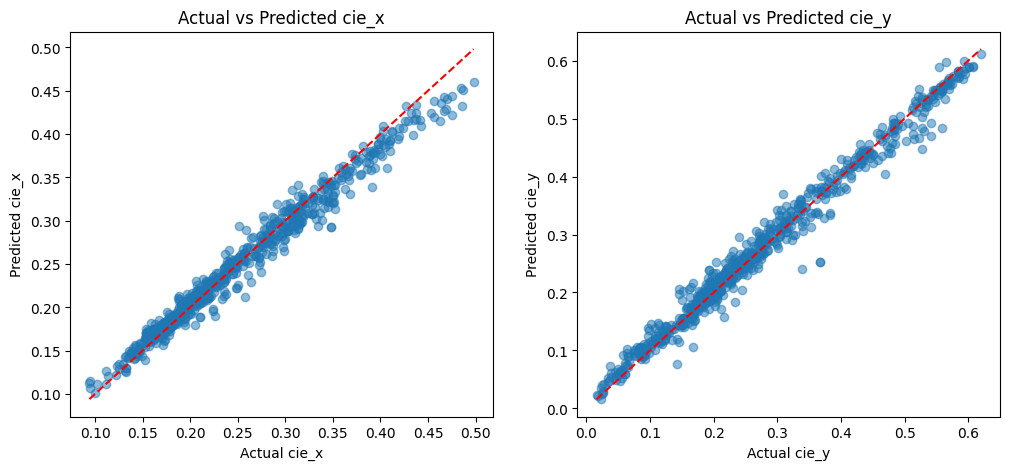

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
plt.plot([min(y_test[:, 0]), max(y_test[:, 0])], [min(y_test[:, 0]), max(y_test[:, 0])], color='red', linestyle='dashed')  # Perfect line
plt.xlabel("Actual cie_x")
plt.ylabel("Predicted cie_x")
plt.title("Actual vs Predicted cie_x")

plt.subplot(1, 2, 2)
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5)
plt.plot([min(y_test[:, 1]), max(y_test[:, 1])], [min(y_test[:, 1]), max(y_test[:, 1])], color='red', linestyle='dashed')  # Perfect line
plt.xlabel("Actual cie_y")
plt.ylabel("Predicted cie_y")
plt.title("Actual vs Predicted cie_y")

plt.show()

In [79]:
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs:.4f}")


Explained Variance Score: 0.9771


# Inverse Network

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
import matplotlib.pyplot as plt

inverse_model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(X_train.shape[1]) 
])

inverse_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
inverse_model.summary()

history_inv = inverse_model.fit(y_train, X_train, epochs=200, batch_size=16, validation_data=(y_test, X_test), verbose=1)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_181 (Dense)                    │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,437 (9.52 KB)

 Trainable params: 2,437 (9.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.0153 - mae: 0.8265 - val_loss: 0.9470 - val_mae: 0.7861
Epoch 2/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9464 - mae: 0.7869 - val_loss: 0.8952 - val_mae: 0.7556
Epoch 3/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8945 - mae: 0.7522 - val_loss: 0.8692 - val_mae: 0.7440
Epoch 4/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8920 - mae: 0.7534 - val_loss: 0.8537 - val_mae: 0.7294
Epoch 5/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8531 - mae: 0.7278 - val_loss: 0.8349 - val_mae: 0.7198
Epoch 6/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8481 - mae: 0.7264 - val_loss: 0.8181 - val_mae: 0.7146
Epoch 7/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8458 - mae: 0.7259 - val_loss: 0.8048 - val_mae: 0.7042
Epoch 8/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8203 - mae: 0.7113 - val_loss: 0.7924 - val_mae: 0.6988
Epoch 9/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [84]:
X_pred = inverse_model.predict(y_test)

mse = mean_squared_error(X_test, X_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(X_test, X_pred)
r2 = r2_score(X_test, X_pred)
evs = explained_variance_score(X_test, X_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Explained Variance Score: {evs:.4f}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error: 0.6759
Root Mean Squared Error: 0.8221
Mean Absolute Error: 0.6240
R-squared: 0.3162
Explained Variance Score: 0.3174


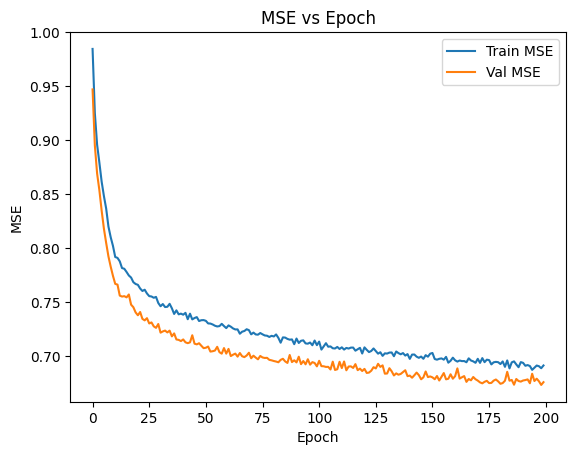

In [85]:
plt.plot(history_inv.history['loss'], label='Train MSE')
plt.plot(history_inv.history['val_loss'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs Epoch')
plt.legend()
plt.show()


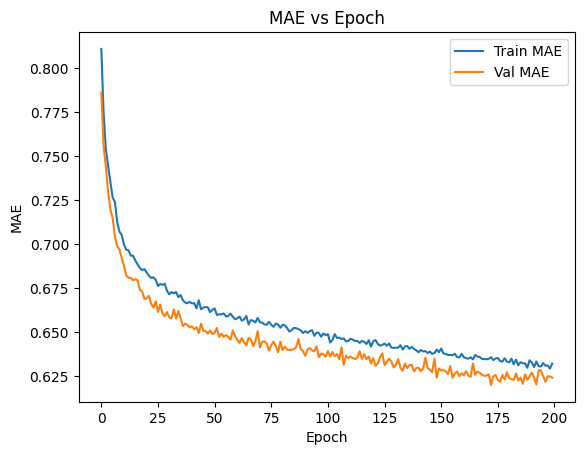

In [86]:
plt.plot(history_inv.history['mae'], label='Train MAE')
plt.plot(history_inv.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE vs Epoch')
plt.legend()
plt.show()


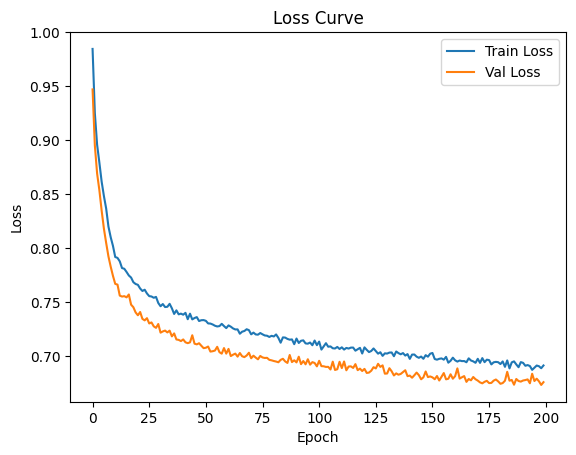

In [87]:
plt.plot(history_inv.history['loss'], label='Train Loss')
plt.plot(history_inv.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


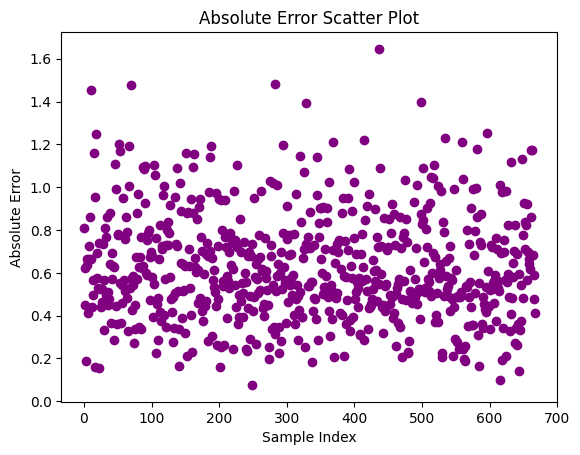

In [88]:
abs_error = np.abs(X_test - X_pred)
mean_abs_error = np.mean(abs_error, axis=1)

plt.scatter(range(len(mean_abs_error)), mean_abs_error, color='purple')
plt.xlabel('Sample Index')
plt.ylabel('Absolute Error')
plt.title('Absolute Error Scatter Plot')
plt.show()


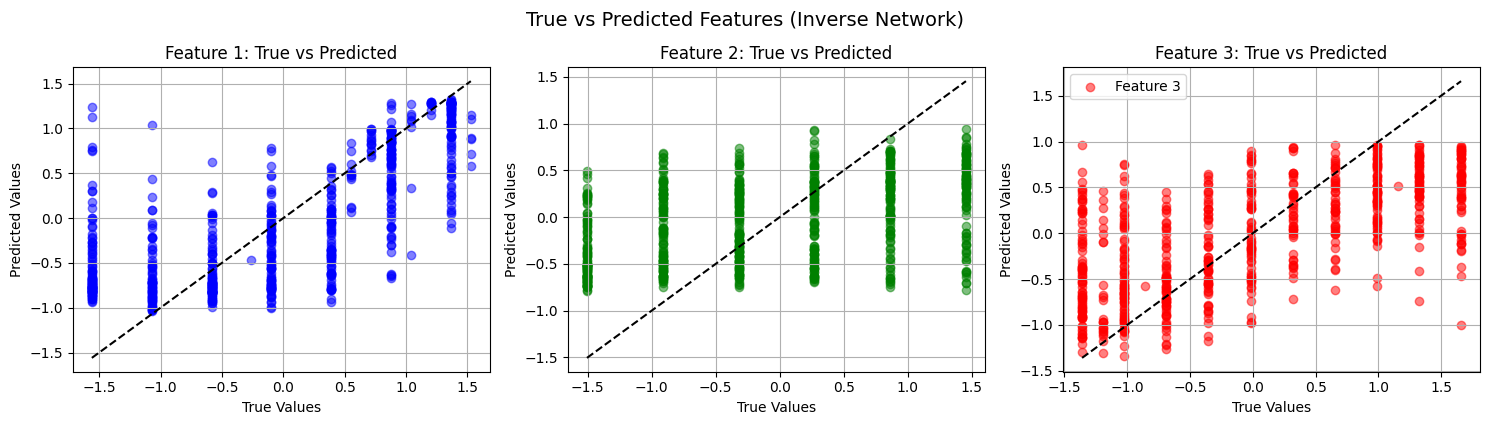

In [92]:
import matplotlib.pyplot as plt

feature_names = ['Feature 1', 'Feature 2', 'Feature 3']  # Customize if needed

plt.figure(figsize=(15, 4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(X_test[:, i], X_pred[:, i], alpha=0.5, label=feature_names[i], color=['blue', 'green', 'red'][i])
    min_val = min(X_test[:, i].min(), X_pred[:, i].min())
    max_val = max(X_test[:, i].max(), X_pred[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{feature_names[i]}: True vs Predicted")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("True vs Predicted Features (Inverse Network)", y=1.05, fontsize=14)
plt.legend()
plt.show()


In [95]:
import pandas as pd

num_nodes = [64, 32]  
batch_size = 16  

test_loss, _ = model.evaluate(X_test_cnn, y_test, verbose=0)  

epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

results = pd.DataFrame({
    'Epoch': epochs,
    'Nodes': [f'{num_nodes[0]}-{num_nodes[1]}'] * len(epochs),  
    'Batch Size': [batch_size] * len(epochs),
    'Train Loss': train_loss,
    'Validation Loss': val_loss,
    'Test Loss': [test_loss] * len(epochs)  
})

print(results)


     Epoch  Nodes  Batch Size  Train Loss  Validation Loss  Test Loss
0        1  64-32          16    0.010662         0.006735   0.000392
1        2  64-32          16    0.006277         0.003997   0.000392
2        3  64-32          16    0.004265         0.002617   0.000392
3        4  64-32          16    0.003117         0.001906   0.000392
4        5  64-32          16    0.002426         0.001944   0.000392
..     ...    ...         ...         ...              ...        ...
195    196  64-32          16    0.000286         0.000380   0.000392
196    197  64-32          16    0.000359         0.000397   0.000392
197    198  64-32          16    0.000317         0.000275   0.000392
198    199  64-32          16    0.000299         0.000331   0.000392
199    200  64-32          16    0.000307         0.000392   0.000392

[200 rows x 6 columns]
